# Advanced Data Analysis - assignment 1

This notebook contains the **Assignment 1** of the Advanced Data Analysis course.

The topic of the assignment consists in performing multiple analysis on weather information, more specifically information about temperature and precipitation.

The data in the dataset provided was obtained from NOAA ([https://www.ncei.noaa.gov/metadata/geoportal/rest/metadata/item/gov.noaa.ncdc:C00861/html](https://www.ncei.noaa.gov/metadata/geoportal/rest/metadata/item/gov.noaa.ncdc:C00861/html)).



### DEADLINE: 28-September-2022

The assignment is **individual**. You should submit your resolution on Moodle by the deadline. 

Students have **three grace days** that they can use for all assignments and group project, which allows them to deliver the projects late. Use these grace days carefully.

[//]: # (We will be using latex for fomulas)

<script type="text/javascript"
        src="https://cdnjs.cloudflare.com/ajax/libs/mathjax/2.7.0/MathJax.js?config=TeX-AMS_CHTML"></script>


### Preliminaries

Just import the libraries that will be needed throughout the assignment.

In [566]:
# imports pandas
import pandas as pd

import os

import matplotlib.pyplot as plt
plt.style.use('seaborn')


## Datasets

For solving the questions posed, you have the following datasets available.

### Weather dara

File ```assignment1/weather.csv``` contains the information about the weather in a set of weather stations located around the world. The dataset includes the following columns:
* date, a date in the format year-month-day (e.g. 1995-01-31):
* id, the id of the weather station;
* tmax, the maximum temperature registered in the given day and weather station (in tenth of degrees);
* tmin, the minimum temperature registered in the given day and weather station (in tenth of degrees);
* prcp, the percipitation registered in the given day and weather station;

The dataset does not includes data for all stations for all the dates - while for some stations, data starts in 1950, for others stations it is available only is shorter intervals; even for stations for which data is available from 1950, the data is missing for some days.

File ```assignment1/stations.csv``` contains information about weather stations. The dataset includes the following columns:
* id, the id of the weather stations;
* lat, the latitude of the stations;
* lon, the longitude of the stations;
* alt, the altitude of the stations;
* name, with the name of the weather station;
* cid, with the code id for the country;


File ```assignment1/regions.csv``` contains information about regions. The dataset includes the following columns:
* region, with the region in which the country is located;
* country, the country name;
* cid, with the code id for the country.


The following given code loads the datasets.


In [567]:
dataFileName = os.path.join( "data-a1", "weather2.csv")

dataDF = pd.read_csv(dataFileName)
dataDF["date"] = pd.to_datetime(dataDF["date"], format="%Y-%m-%d")

print(dataDF.head(5))

            id       date  tmax  tmin  prcp
0  AG000060390 1950-01-01   162    80    91
1  AG000060390 1950-01-02   129    74   153
2  AG000060390 1950-01-03   138    70     0
3  AG000060390 1950-01-04   163    68     0
4  AG000060390 1950-01-05   172    57     0


In [568]:
stationsFileName = os.path.join( "data-a1", "stations.csv")

stationsDF = pd.read_csv(stationsFileName)

print(stationsDF.head(5))

            id      lat      lon     alt                   name cid
0  ACW00011604  17.1167 -61.7833    10.1  ST JOHNS COOLIDGE FLD  AC
1  ACW00011647  17.1333 -61.7833    19.2               ST JOHNS  AC
2  AE000041196  25.3330  55.5170    34.0    SHARJAH INTER. AIRP  AE
3  AF000040930  35.3170  69.0170  3366.0           NORTH-SALANG  AF
4  AG000060390  36.7167   3.2500    24.0     ALGER-DAR EL BEIDA  AG


In [569]:
regionsFileName = os.path.join( "data-a1", "regions.csv")

regionsDF = pd.read_csv(regionsFileName)

print(regionsDF.head(5))

          region               country cid
0  North America         United States  US
1    Middle East  United Arab Emirates  AE
2         Africa              Ethiopia  ET
3         Africa               Algeria  AG
4           Asia            Kazakhstan  KZ


## Question 1 (6 points)

In this question, we start by exploring the data available with simple queries. In you answers, you can use the data computed in the previous one, when usefull.


### **1.a)** What are the three highest and lowest temperatures and the maximum precipitation registered, when and in which station were they registered?


In [570]:
#Solve question here. Add a Markdown cell after this cell if you want to add some comment on you solution.

merged_data = dataDF.merge(stationsDF, on = 'id').merge(regionsDF, on = 'cid')

#Get Maximum Temperature by getting the 3 largest values on merged_data Dataframe on column tmax
max_temperature = merged_data.nlargest(3,['tmax'])
for i in range(3):
    print("Maximum Temperature: " , max_temperature['tmax'].values[i], ", on Date ", 
        max_temperature['date'].values[i], ", in ", max_temperature['name'].values[i], " Station", sep='')
print("")

#Get Maximum Temperature by getting the 3 smallest values on merged_data Dataframe on column tmnin
min_temp = merged_data.nsmallest(3,['tmin'])
for i in range(3):
    print("Minimum Temperature: " , min_temp['tmin'].values[i], ", on Date ", 
        min_temp['date'].values[i], ", in ", min_temp['name'].values[i], " Station", sep='')
print("")

#Get Maximum Temperature by getting the largest value on merged_data Dataframe on column prcp
max_precipitation = merged_data.nlargest(1,['prcp'])
print("Maximum precipitation: ", max_precipitation.prcp.item(), ", on Date ",max_precipitation.date.item(),
    ", in ", max_precipitation.name.item()," Station", sep='')

Maximum Temperature: 513, on Date 1998-08-20T00:00:00.000000000, in KUWAIT INTERNATIONA Station
Maximum Temperature: 512, on Date 1990-07-25T00:00:00.000000000, in KUWAIT INTERNATIONA Station
Maximum Temperature: 510, on Date 1995-08-14T00:00:00.000000000, in KUWAIT INTERNATIONA Station

Minimum Temperature: -512, on Date 1950-01-25T00:00:00.000000000, in BANFF Station
Minimum Temperature: -461, on Date 1950-01-02T00:00:00.000000000, in BANFF Station
Minimum Temperature: -461, on Date 1950-01-25T00:00:00.000000000, in SASKATOON AIRPORT Station

Maximum precipitation: 7780, on Date 1978-04-05 00:00:00, in JEDDAH (KING ABDUL Station


### 1.b) Print the information for the top-3 days with the highest and lowest temperature and the maximum precipitation in station PO000008535 (Lisbon).


In [571]:
#Solve question here. Add a Markdown cell after this cell if you want to add some comment on you solution.

#Locate and save on lisbonDF all the data from merged_data that has the id equalled to PO000008535
lisbonDF = merged_data.loc[merged_data['id'] == "PO000008535"]

print("Information about the 3 days with the highest temperature:","\n",lisbonDF.nlargest(3,['tmax']),"\n")
print("Information about the 3 days with the lowest temperature:","\n",lisbonDF.nsmallest(3,['tmin']),"\n")
print("Information about the day with the maximum precipitation:","\n",lisbonDF.nlargest(1,['prcp']))

Information about the 3 days with the highest temperature: 
                   id       date  tmax  tmin  prcp      lat   lon   alt  \
1515468  PO000008535 2018-08-04   420   281     0  38.7167 -9.15  77.0   
1502268  PO000008535 1981-06-13   415   219     0  38.7167 -9.15  77.0   
1505954  PO000008535 1991-07-17   406   246     0  38.7167 -9.15  77.0   

                     name cid  region   country  
1515468  LISBOA GEOFISICA  PO  Europe  Portugal  
1502268  LISBOA GEOFISICA  PO  Europe  Portugal  
1505954  LISBOA GEOFISICA  PO  Europe  Portugal   

Information about the 3 days with the lowest temperature: 
                   id       date  tmax  tmin  prcp      lat   lon   alt  \
1492278  PO000008535 1954-02-05   115    -9     0  38.7167 -9.15  77.0   
1493014  PO000008535 1956-02-11    68    -8     0  38.7167 -9.15  77.0   
1493015  PO000008535 1956-02-12   100    -8     0  38.7167 -9.15  77.0   

                     name cid  region   country  
1492278  LISBOA GEOFISICA  PO  Eu

#### 1.b
On the question above I am presenting the dataframe with the full information requested about PO000008535, which gives the whole information about the specific days that were asked us to find

### 1.c) For Lisbon, how many days had maximum temperature higher or equal to 30ºC, per year, since 1970?

**NOTE:** in a DataFrame ```df```, with column ```d``` with a datetime, it is possible to access the year with ```df["d"].dt.year```.


In [572]:
#Solve question here. Add a Markdown cell after this cell if you want to add some comment on you solution.

#Locate and save on lisbon_since_1970DF all the info of lisbon meeting the condition asked
lisbon_since_1970DF = lisbonDF.loc[(lisbonDF['tmax'] >= 300) & (lisbonDF['date'].dt.year >= 1970)]

#Save on lisbon_per_yearDF the number of appearences of an year in datframe
lisbon_count_yearDF = lisbon_since_1970DF[['id']].groupby(lisbon_since_1970DF['date'].dt.year).count()

for i in lisbon_count_yearDF.index:
    print("Year", i, "had", lisbon_count_yearDF.at[i,'id'], "days with temperature greater or equal to 30")



Year 1970 had 26 days with temperature greater or equal to 30
Year 1971 had 17 days with temperature greater or equal to 30
Year 1972 had 8 days with temperature greater or equal to 30
Year 1973 had 22 days with temperature greater or equal to 30
Year 1974 had 33 days with temperature greater or equal to 30
Year 1975 had 18 days with temperature greater or equal to 30
Year 1976 had 25 days with temperature greater or equal to 30
Year 1977 had 16 days with temperature greater or equal to 30
Year 1978 had 28 days with temperature greater or equal to 30
Year 1979 had 20 days with temperature greater or equal to 30
Year 1980 had 28 days with temperature greater or equal to 30
Year 1981 had 31 days with temperature greater or equal to 30
Year 1982 had 20 days with temperature greater or equal to 30
Year 1983 had 20 days with temperature greater or equal to 30
Year 1984 had 26 days with temperature greater or equal to 30
Year 1985 had 26 days with temperature greater or equal to 30
Year 1986

### 1.d) Print information about the top-10 days with the largest temperature difference?


In [573]:
#Solve question here. Add a Markdown cell after this cell if you want to add some comment on you solution.

#Copy the merged_data to a new Dataframe using function copy to make sure that the changes we are doing on new Dataframe are applied to merged_data
diffence_temperatureDF = merged_data.copy()

#Create a new column with the diffenrence between the values on column tmax and tmin
diffence_temperatureDF['difference'] = diffence_temperatureDF['tmax'] - diffence_temperatureDF['tmin']

#Perguntar à Ticha se acha que deviamos mostrar mostrar no data frame a diferença ou so mesmo os paises fazendo um loop com o .at()
print(diffence_temperatureDF.nlargest(10,['difference']))

                  id       date  tmax  tmin  prcp     lat      lon     alt  \
362484   CA008103100 1951-02-07   117  -250     8  46.100  -64.780    12.0   
300894   CA006105976 1950-03-04    17  -339     0  45.380  -75.720    79.0   
288881   CA004057120 1976-12-10    22  -328     0  52.167 -106.683   500.0   
378097   CA008103100 1994-01-28    95  -250   103  46.100  -64.780    12.0   
1206923  KZ000035188 1951-02-17   -50  -395    10  51.133   71.367   350.0   
1287287  MG000044272 1988-02-24   102  -239     0  47.750   96.850  1759.0   
304093   CA006105976 1958-12-22    17  -322    36  45.380  -75.720    79.0   
370817   CA008103100 1974-01-21    72  -267    38  46.100  -64.780    12.0   
304145   CA006105976 1959-02-12    28  -306     0  45.380  -75.720    79.0   
323805   CA006105976 2013-01-18    98  -235    62  45.380  -75.720    79.0   

                      name cid         region     country  difference  
362484             MONCTON  CA  North America      Canada         367

### 1.e) Find maximum values for all weather stations

For all weather stations, print their respective highest temperature, lowest temperature and maximum precipitation since 1970.


In [574]:
#Solve question here. Add a Markdown cell after this cell if you want to add some comment on you solution.

#Locate and save in a new dataframe all info on merged since 1970
since1970DF = merged_data.loc[merged_data['date'].dt.year >= 1970]

#Save in a new dataframe which is grouped by the name of the station and that contains the maximum value for tmax,
# the minimum value to tmin and the highest precipitation value respectively
since1970_auxDF = pd.DataFrame(since1970DF.groupby('name')['tmax'].max())
since1970_auxDF['tmin'] = pd.DataFrame(since1970DF.groupby('name')['tmin'].min())
since1970_auxDF['prcp'] = pd.DataFrame(since1970DF.groupby('name')['prcp'].max())

#Loop the dataframe to print all the information
for i in since1970_auxDF.index:
    print("The highest temperature in", i, "was", since1970_auxDF.at[i,'tmax'], ", the lowest was", 
    since1970_auxDF.at[i,'tmin'], "and the maximum precipitation was", since1970_auxDF.at[i,'prcp'], "since 1970")

The highest temperature in ADDIS ABABA-BOLE was 320 , the lowest was 0 and the maximum precipitation was 2601 since 1970
The highest temperature in ALEKSANDROVSK-SAHAL was 313 , the lowest was -378 and the maximum precipitation was 818 since 1970
The highest temperature in ALGER-DAR EL BEIDA was 475 , the lowest was -33 and the maximum precipitation was 1366 since 1970
The highest temperature in AREQUIPA was 320 , the lowest was -20 and the maximum precipitation was 2362 since 1970
The highest temperature in ASSWAN was 480 , the lowest was 10 and the maximum precipitation was 990 since 1970
The highest temperature in ASTANA was 401 , the lowest was -428 and the maximum precipitation was 858 since 1970
The highest temperature in BAJRAMALY was 463 , the lowest was -212 and the maximum precipitation was 991 since 1970
The highest temperature in BANFF was 378 , the lowest was -430 and the maximum precipitation was 597 since 1970
The highest temperature in BANGALORE was 385 , the lowest was

## Question 2 (5 points)

This second question focus on processing the information on a time series for plotting it.


### 2.a) Display the information about temperatures and precipitation for a single station of your choice from 2018 to 2019.

Plot the information about temperatures and percipitation in some selected station from 2018 to 2019. In your answer consider that it would be useful to have access not only to the raw data but also to observe the trend of temperature variability over the year, without being too impacted by the natural day-to-day variability.

In the rationale of your solution, discuss the parameters used to smooth the lines.


/var/folders/d7/_pxn_4nd08v5f758s2k6y_580000gn/T/ipykernel_33234/2712896444.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lisbonDF_to_Plot['tmaxSMA'] = lisbonDF_to_Plot['tmax'].rolling(30).mean()
/var/folders/d7/_pxn_4nd08v5f758s2k6y_580000gn/T/ipykernel_33234/2712896444.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lisbonDF_to_Plot['tminSMA'] = lisbonDF_to_Plot['tmin'].rolling(30).mean()
/var/folders/d7/_pxn_4nd08v5f758s2k6y_580000gn/T/ipykernel_33234/2712896444.py:9: SettingWithCopyWarning: 
A

<AxesSubplot:xlabel='date'>

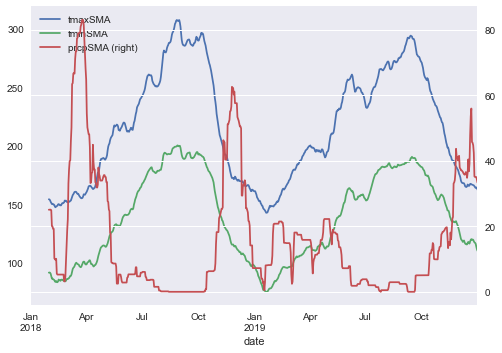

In [575]:
#Solve question here. Briefly justy you solution in the following markdown cell.

#Save in new dataframe the info of lisbon between 2018 and 2019
lisbonDF_to_Plot = lisbonDF[(lisbonDF['date'].dt.year >= 2018) & (lisbonDF['date'].dt.year <= 2019 )]

#Applying a Simple Moving Average to the values to avoid some not relevant variations
lisbonDF_to_Plot['tmaxSMA'] = lisbonDF_to_Plot['tmax'].rolling(30).mean()
lisbonDF_to_Plot['tminSMA'] = lisbonDF_to_Plot['tmin'].rolling(30).mean()
lisbonDF_to_Plot['prcpSMA'] = lisbonDF_to_Plot['prcp'].rolling(30).mean()

#Plot the info
lisbonDF_to_Plot.plot(x="date",y=['tmaxSMA','tminSMA','prcpSMA'], secondary_y = ['prcpSMA'])

**Rationale:**
To smooth the lines I used a Simple Moving Average with value of 30. I choosed 30 becaus its the average of days in a month and it because helps eliminating some variantion that are useless.

### 2.b) Display long-term trends.

In this question we want to verify the long term trends. In particular, we want to know whether the average temperature or difference between maximum and minimum temperature has been increasing over the years or the precipiation has been descreasing in the full period for which data is available, without being too much impacted by the natural variability over each year. 

NOTE: compute the average temperature in a day as the average between the maximum and minimum temperatures of that day.

Select 2 weather stations in different continents, compute the necessary data and plot it.

/var/folders/d7/_pxn_4nd08v5f758s2k6y_580000gn/T/ipykernel_33234/3451947421.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lisbon_averageDF['SMA'] = lisbon_averageDF['average'].rolling(365).mean()
/var/folders/d7/_pxn_4nd08v5f758s2k6y_580000gn/T/ipykernel_33234/3451947421.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  us_averageDF['SMA'] = us_averageDF['average'].rolling(365).mean()


<AxesSubplot:xlabel='date'>

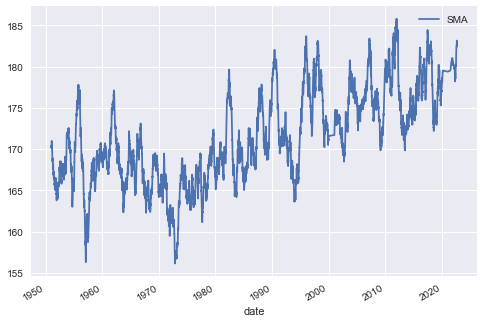

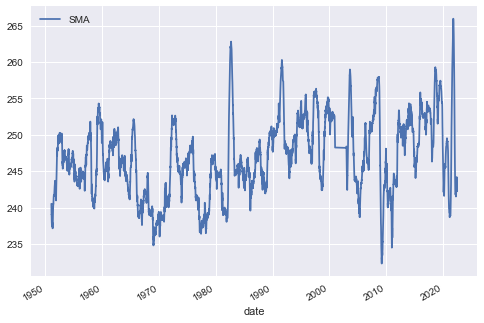

In [576]:
#Solve question here. Briefly justy you solution in the following markdown cell.

average_Temp_Data = merged_data.copy()
#Create a column with the average between tmax and tmin
average_Temp_Data['average'] = (average_Temp_Data['tmax'] + average_Temp_Data['tmin'])/2

lisbon_averageDF = average_Temp_Data.loc[(average_Temp_Data['id'] == "PO000008535")]
lisbon_averageDF['SMA'] = lisbon_averageDF['average'].rolling(365).mean()

us_averageDF = average_Temp_Data.loc[average_Temp_Data['id'] == "USW00092811"]
us_averageDF['SMA'] = us_averageDF['average'].rolling(365).mean()


lisbon_averageDF.plot(x = 'date', y = 'SMA')
us_averageDF.plot(x = 'date', y = 'SMA')




**Rationale:**
The stations I have chosen are one in Portugal and the other in the USA, and to smooth the lines I thought of doing a Simple Moving Average with the value 365 because there are so many years that what I want from that is to eliminate some variations over the year that I think are useless.


## Question 3 (4 points)

This third question focus on understanding the relations between weather elements.


### 3.a) Is there any relation between different weather elements for a given city?

For a given weather station, let's start by investigating if there is a relation between the different weather elements.



In [577]:
#Solve question here. Briefly justy you solution in the following markdown cell.

corrVals = lisbonDF[["tmax","tmin","prcp"]].corr()
print(corrVals)



          tmax      tmin      prcp
tmax  1.000000  0.802520 -0.209511
tmin  0.802520  1.000000 -0.089456
prcp -0.209511 -0.089456  1.000000


**Present an interpretation of the results here:**

The matrix above shows us the the correlation between all 3 elements (tmax, tmin, prpc). The correlation value can be from -1 to 1 where -1 is a good negative correlation, 0 is a bad correlation or basically its has no correlation, and 1 means that has a good positive correlation. The correlation value betweeboth tmin and tmax is 0.80250 which is a good correlation and it means that for 1 degree in increased/decreased on tmax the tmin also increase/dicrease 0.80250. The other correlation value obtained was between tmax and prpc of -0.20 and it makes sense since when the temperature increase the precipitation will probably dicrease, and the same applies to the correlation between tmin and prcp.


### 3.b) Is there a relation between weather elements in different cities?

Select three cities, two of which you believe have similar weather and other with different weather and use the studied methods to confirm you intuitions (or not) for the different weather elements.

In the Markdown cell below your code, comment the results obtained.



In [578]:
#Solve question here. Briefly justy you solution in the following markdown cell.
#FAZER CORRELAÇÕES A PARES 2 A 2 , ENTRE AS 2 PARECIDAS E UMA DAS PARECIDADS E A DIFERENTE

#Locate and save in a new dataframe all information on merged_data dataframe about PORTO
portoDF = merged_data.loc[(merged_data['name'] == "PORTO")]
portoDF = portoDF.reset_index()

#Locate and save in a new dataframe all information on merged_data dataframe about SYDNEY AIRPORT AMO
moscowDF = merged_data.loc[(merged_data['name'] == "SYDNEY AIRPORT AMO")]
moscowDF = moscowDF.reset_index()

#Get correlation values of the 3 elements between all the cities
lisbon_porto_corr = portoDF[['tmin','tmax','prcp']].corrwith(lisbonDF[['tmin','tmax','prcp']])
lisbon_moscow_corr = moscowDF[['tmin','tmax','prcp']].corrwith(lisbonDF[['tmin','tmax','prcp']])
porto_moscow_corr = moscowDF[['tmin','tmax','prcp']].corrwith(portoDF[['tmin','tmax','prcp']])

#Print the information about the correlation
print("The correlations between Lisbon and Porto for the 3 different elements are:\n", lisbon_porto_corr, sep = "")
print("The correlations between Lisbon and Sydney for the 3 different elements are:\n", lisbon_moscow_corr, sep = "")
print("The correlations between Porto and Sydney for the 3 different elements are:\n", porto_moscow_corr, sep = "")

The correlations between Lisbon and Porto for the 3 different elements are:
tmin   NaN
tmax   NaN
prcp   NaN
dtype: float64
The correlations between Lisbon and Sydney for the 3 different elements are:
tmin   NaN
tmax   NaN
prcp   NaN
dtype: float64
The correlations between Porto and Sydney for the 3 different elements are:
tmin   -0.379520
tmax   -0.293844
prcp   -0.008909
dtype: float64


**Rationale and comments:**

The 2 cities I have choosen that I thought that had a similar weather were Lisbon and Madrid and as we can see on the results the correlation on both tmax and tmin are high so it means they gave similar values. Even the correlation between the precipitation is a bit high so we can conclude the weather is quite similar.
The other city that I've choosen was Sydney and for the same reason, after getting the correlation between it and the both cities choosed before we can see that the values are low so it means that the weather between this cities are different.

## Question 4 (5 points)

This fourth question focus on doing analysis at a country or region-scale.
.

### 4.a) Display the higest and lowest temperature and highest percipitation in each region


In [579]:
#Solve question here. Add a Markdown cell after this cell if you want to add some comment on you solution.
each_reagionDF = pd.DataFrame(merged_data.groupby('region')['tmax'].max())
each_reagionDF['tmin'] = pd.DataFrame(merged_data.groupby('region')['tmin'].min())
each_reagionDF['prcp'] = pd.DataFrame(merged_data.groupby('region')['prcp'].max())

for i in each_reagionDF.index:
    print("The highest temperature in", i, "was", each_reagionDF.at[i,'tmax'], ", the lowest was", 
    each_reagionDF.at[i,'tmin'], "and the maximum precipitation was", each_reagionDF.at[i,'prcp'])


The highest temperature in Africa was 498 , the lowest was -85 and the maximum precipitation was 5001
The highest temperature in Asia was 490 , the lowest was -440 and the maximum precipitation was 4549
The highest temperature in Australia/South Pacific was 467 , the lowest was -67 and the maximum precipitation was 3276
The highest temperature in Europe was 442 , the lowest was -381 and the maximum precipitation was 2000
The highest temperature in Middle East was 513 , the lowest was -139 and the maximum precipitation was 7780
The highest temperature in North America was 433 , the lowest was -512 and the maximum precipitation was 2794
The highest temperature in South/Central America & Carribean was 456 , the lowest was -85 and the maximum precipitation was 4900


### 4.2 Compare the evolution of average temperature in different regions 

Compute and plot the information of the average temperature in different regions (using the regions defined in the given datasets).

**Suggestion:** In your reply, you need to consder the granularity of data aggregation to help displaying data.

/var/folders/d7/_pxn_4nd08v5f758s2k6y_580000gn/T/ipykernel_33234/1438540280.py:7: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  res = pd.DataFrame(res_aux.groupby('date')['tmax','tmin'].mean())
/var/folders/d7/_pxn_4nd08v5f758s2k6y_580000gn/T/ipykernel_33234/1438540280.py:7: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  res = pd.DataFrame(res_aux.groupby('date')['tmax','tmin'].mean())
/var/folders/d7/_pxn_4nd08v5f758s2k6y_580000gn/T/ipykernel_33234/1438540280.py:7: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  res = pd.DataFrame(res_aux.groupby('date')['tmax','tmin'].mean())
/var/folders/d7/_pxn_4nd08v5f758s2k6y_580000gn/T/ipykernel_33234/1438540280.py:7: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be 

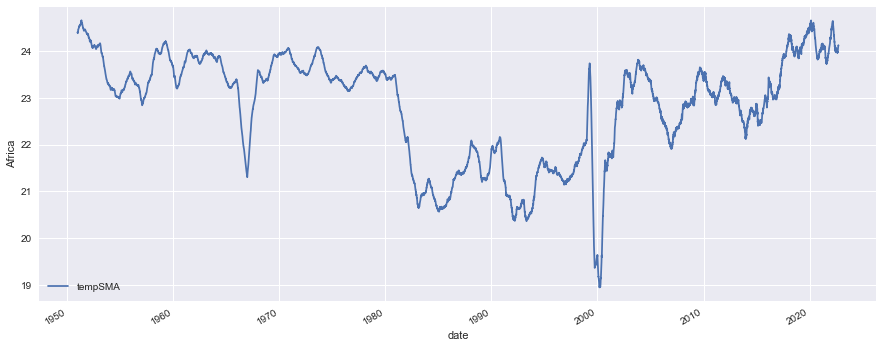

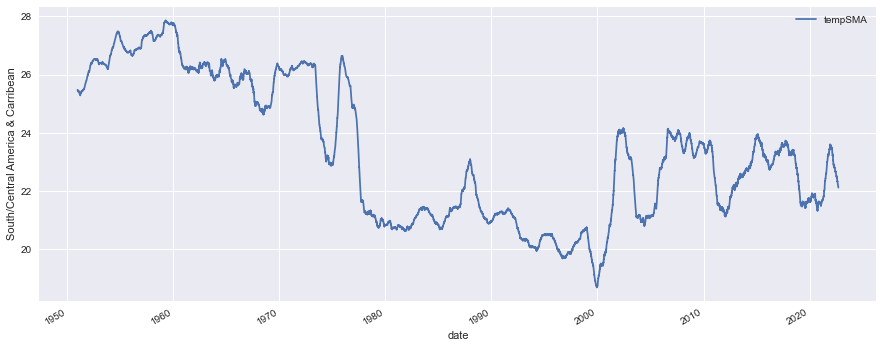

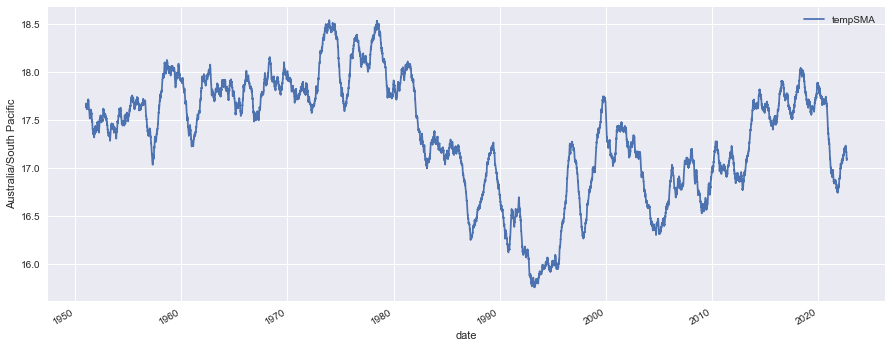

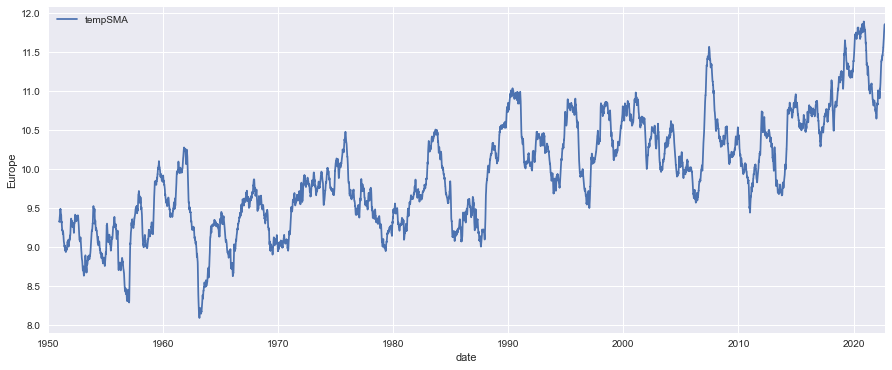

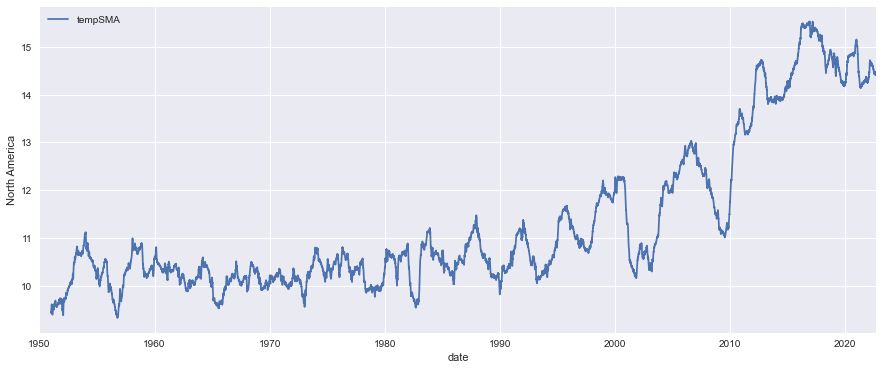

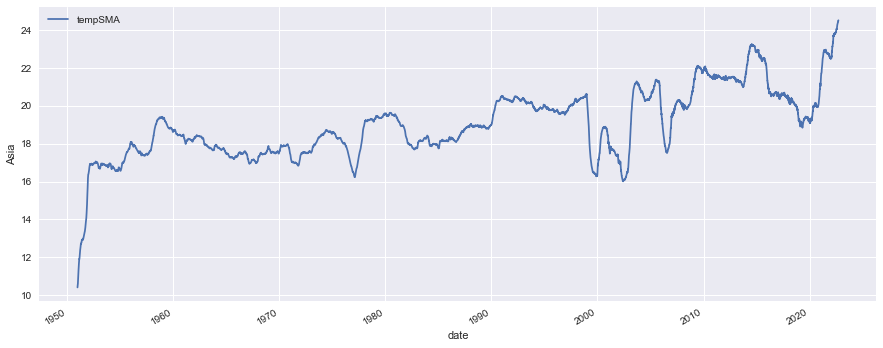

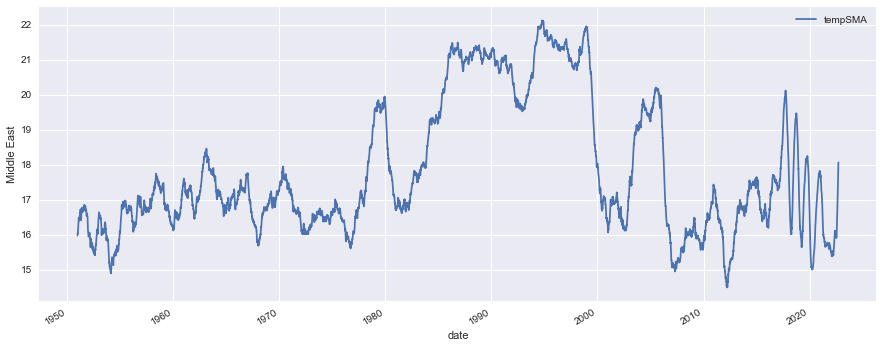

In [580]:
#Solve question here. Briefly justy you solution in the following markdown cell.

#Create a function that receives a list of regions as a parameter and then plot the graphs for each region aswell 
def tempEvolution(region):
    for i in region:
        res_aux = merged_data.loc[(merged_data['region'] == i) & (merged_data['date'].dt.year >= 1950)]
        res = pd.DataFrame(res_aux.groupby('date')['tmax','tmin'].mean())
        res["test"] = (res['tmax']/10 + res['tmin']/10)/2
        res['tempSMA'] = res['test'].rolling(365).mean()
        res.plot(y = 'tempSMA', figsize =(15,6), ylabel = i)
    return

tempEvolution(merged_data['region'].unique())

**Comments:**

I just thought of doing a function that receives a list with the regions and then do the plotting for all the regions. I also splitted all the plots because otherwise would be a lot of information in just one and it would be morede difficult to analyze.

**Rationale:** to be completed

### 4.3 There are regions and regions...

The defined regions span a wide range of latitudes, that include areas with quite different weather conditions. For studying the evolution of weather in different regions, there could be other ways of grouping the weather stations.

Propose one such method and compute and plot the information with the given grouping.


                tmax      latSMA
lat                             
-46.4170  147.618585         NaN
-39.0170  178.044606         NaN
-37.8075  201.964071         NaN
-33.9465  224.685987         NaN
-33.8607  223.501920  195.163034
...              ...         ...
 60.1667   87.256868   91.009721
 64.1331   75.035714   84.697064
 65.2667   63.601442   79.706540
 69.6539   55.766188   71.875656
 74.5167    7.575407   57.847124

[130 rows x 2 columns]


<AxesSubplot:xlabel='lat'>

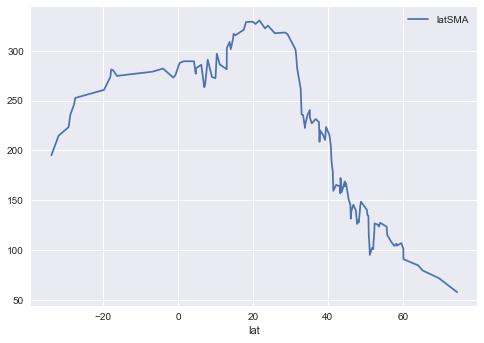

In [581]:
#Solve question here. Briefly justify you solution in the following markdown cell.

latDF = pd.DataFrame(merged_data.groupby('lat')['tmax'].mean())
latDF['latSMA'] = latDF['tmax'].rolling(5).mean()
print(latDF)
latDF.plot(y='latSMA')


**Rationale:** to be completed